# PA005: High Value Customer Identification ( Insiders )

## 0.0. Planejamento da Solução ( IOT )

### Input - Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de Fidelização.
    
    
2. Conjunto de Dados
    - Vendas de um e-commerce online, durante o período de um ano.

### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders
    - Lista: client_id | is_insider 
                   1023| yes/1
                   

2. Relatório com as respostas das perguntas de negócio
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Task - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders?
    - O que é ser elegível? O que são clientes de maior "valor"?
    - Faturamento:
        - Alto Ticket Médio - Quanto o cliente gastou em média na empresa;
        - Alto LTV - Durante seu tempo na empresa, quanto você já gastou?;
        - Baixa Recência - Tempo entre as compras;
        - Alto Basket Size - Tamanho da cesta de compras;
        - Baixa probabilidade de Churn - Quando a pessoa parou de comprar de você;
        - Alta previsão de LTV;
        - Alta propensão de compra
        
    - Custo:
        - Baixa taxa de devolução;
        
    - Experiência de comora:
        - Média alta das avaliações


2. Quantos clientes farão parte do grupo?
    - Número total de clientes;
    - % do grupo Insiders.


3. Quais as principais características desses clientes?
    - Escrever características do cliente:
        - Idade;
        - Localização.
    
    - Escrever características do consumo
        - Atributos da clusterização


4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
    - Faturamento total do ano;
    - Faturamento total do grupo.


5. Qual a expectativa de faturamento desse grupo para os próximos meses?
    - LTV do grupo Insiders;
    - Análise de Cohort - Análise onde eu marco uma pessoa no tempo.
    

6. Quais as condições para uma pessoa ser elegível ao Insiders?
    - Definir a periodicidade (1 mes, 3 meses);
    - A pessoa precisa ser similar com uma pessoa do grupo


7. Quais as condições para uma pessoa ser removida do Insiders?
    - Definir a periodicidade (1 mes, 3 meses);
    - A pessoa precisa ser não similar com uma pessoa do grupo


8. Qual a garantia que o programa Insiders é melhor que o restante da base?
    - Teste A/B;
    - Teste A/B Bayesiano;
    - Teste de Hipóteses.


9. Quais ações o time de marketing pode realizar para aumentar o faturame1.
    - Desconto;
    - Preferência de compra;
    - Frete;
    - Visita a empresa.

# 0.0. Imports

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML

from sklearn import cluster as c

## 0.1. Helper Functions

In [49]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display(HTML('<style>.container{width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load dataset

In [50]:
# read data
url='https://drive.google.com/file/d/1P2xz5nr3c8lPJ2esMb-N0uQs0TiTAeNW/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_raw = pd.read_csv(url_, encoding='windows-1252')

# drop extra column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)

In [51]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [52]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. Decrição dos Dados

In [53]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [54]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [55]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [56]:
df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
75444,542597,48188,DOORMAT WELCOME PUPPIES,2,28-Jan-17,7.95,16326.0,United Kingdom


## 1.2. Data Dimensions

In [57]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of columns: 8


## 1.3. Data Types

In [58]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [59]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.4. Chek NA

In [60]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [61]:
# remova NA
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Removed Data: {:.2f}%'.format(100 * (1 - (df1.shape[0]/df_raw.shape[0]))))

Removed Data: 24.93%


In [62]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change Dtypes

In [63]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [64]:
# invoice date
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

In [65]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

# 2.0. Feature Engineering

In [66]:
df2 = df1.copy()

## 2.1. Feature Creation

In [67]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [68]:
# data reference
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 
                   'quantity','invoice_date', 'unit_price', 
                   'country'], axis=1).drop_duplicates(ignore_index=True)
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [69]:
# Gross Revenue - Faturamento - Quantity * Price
df2['gross_revenue']  = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Recency - Last Day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

# Frequency
df_frequency = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_frequency, on='customer_id', how='left')

# 3.0. Filtragem de Variáveis

In [70]:
df3 = df_ref.copy()

# 4.0. EDA - Exploratory Data Analysis

In [71]:
df4 = df3.copy()

# 5.0. Data Preparation

In [72]:
df5 = df4.copy()

# 6.0. Feature Selection

In [73]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [74]:
X = df6.drop(columns = ['customer_id'])

In [75]:
clusters = [2, 3, 4, 5, 6]

## 7.1. Withins-Cluster Sum of Square (WSS)

Text(0.5, 1.0, 'WSS vs K')

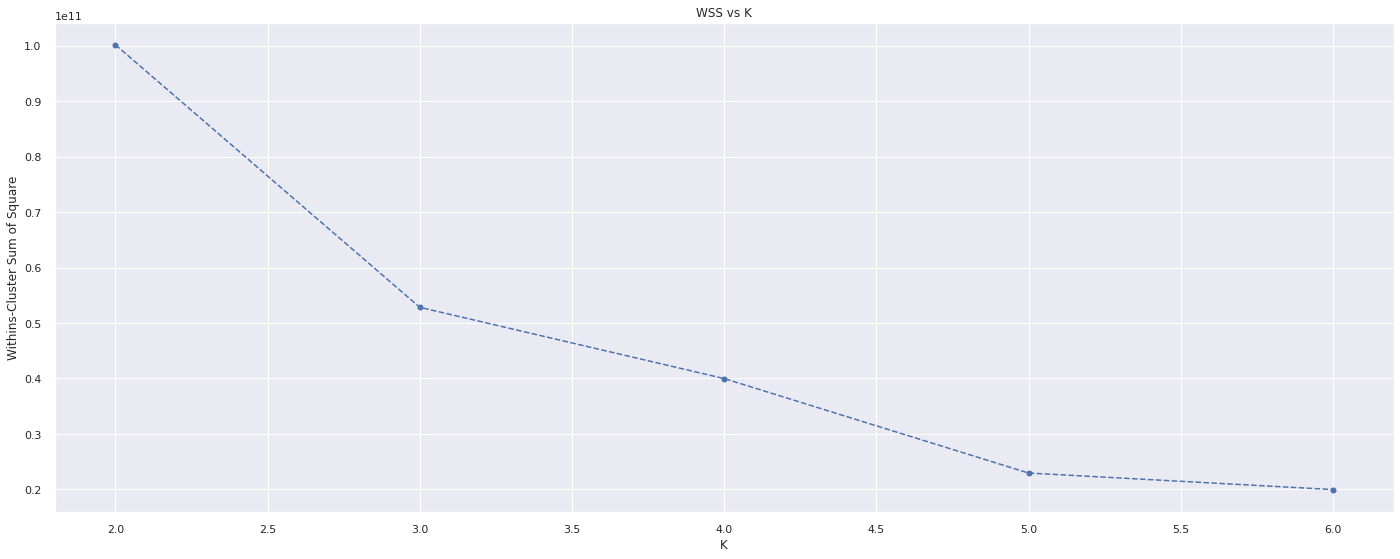

In [76]:
wss = []
for k in clusters:
    # model definitions
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_)
    
# plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Withins-Cluster Sum of Square')
plt.title('WSS vs K')

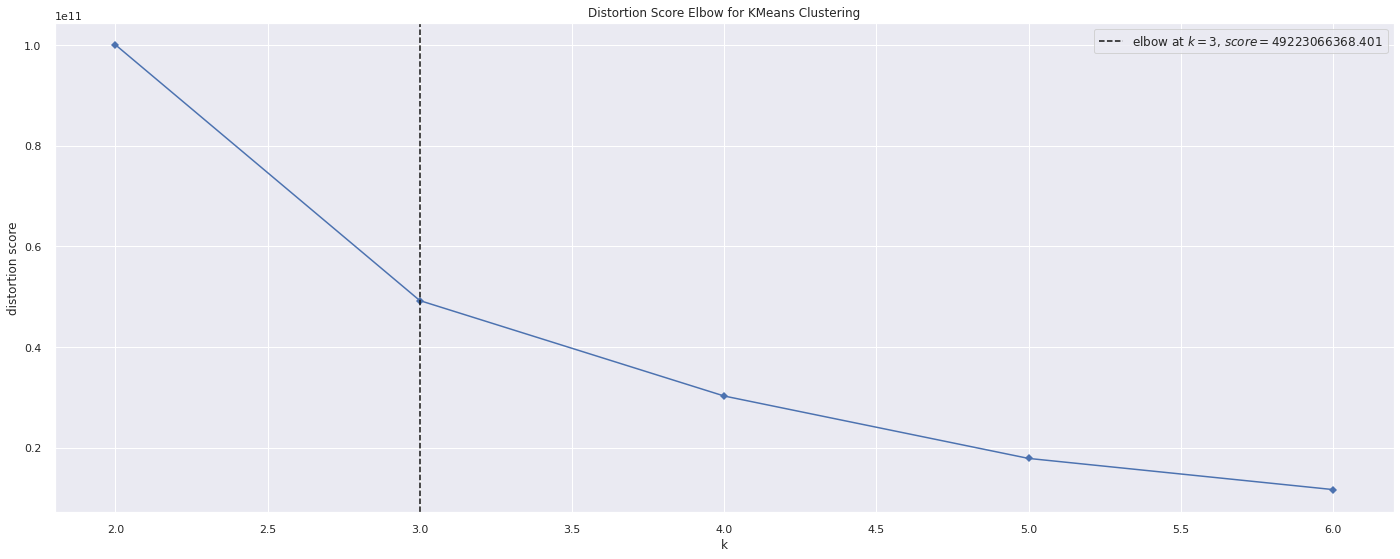

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()

## 7.2. Sillhouette Score

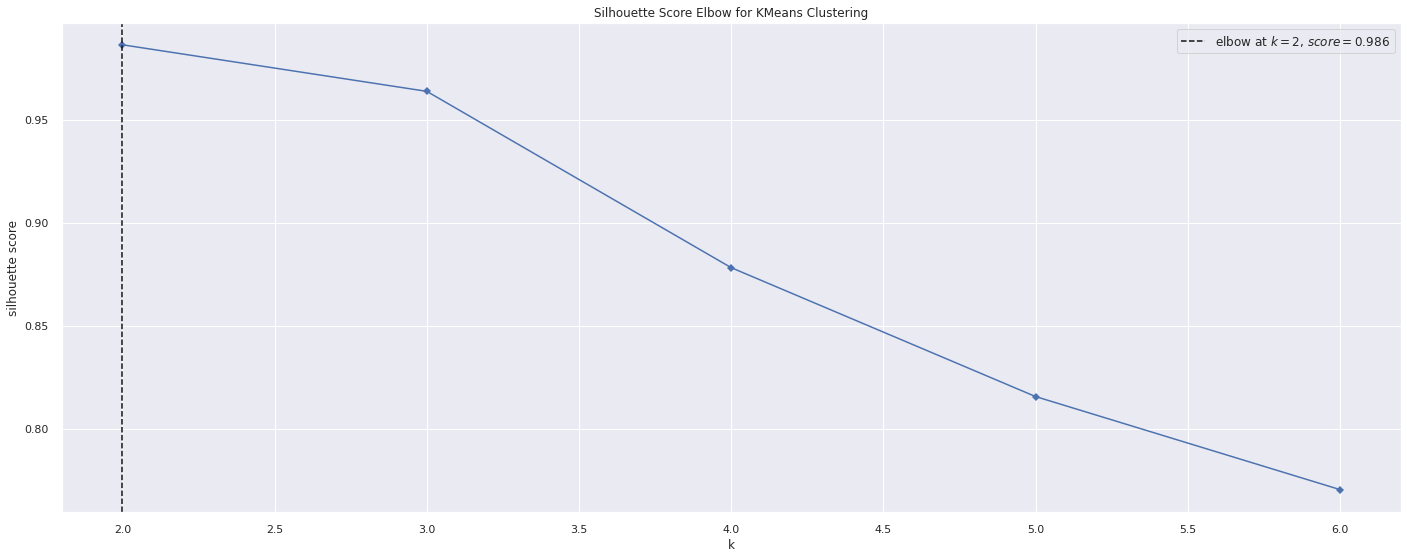

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [78]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False, metric = 'silhouette')
kmeans.fit(X)
kmeans.show()

# 8.0. Model Training

# 9.0. Cluster Analysis

# 10.0. Deploy To Production